In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.metrics import classification_report # classification report

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## checking for and dealing with correlations between variables
- Pearson correlation: used when checking the correlation between categorical variables and/or correlation between categorical and continuous variables
 - values nearest to 1 and -1 show high correlation
 - some variables are correlated:
    - duration of credit & credit amount
    - no. of credits at this bank & payment status of previous credit

In [2]:
df = pd.read_csv('german_credit.csv')

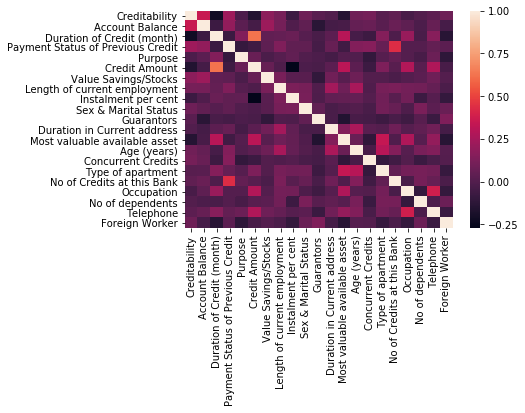

In [3]:
corr = df.corr(method ='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## baseline model

In [27]:
X, y = df.loc[:, df.columns != 'Creditability'], df['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuracy of logistic regression classifier on test set: 0.74


Predicted Result,0,1
Actual Result,,
0,24,40
1,11,125


## let's remove these variables and see if model performance changes

In [29]:
X, y = df.drop(['Creditability', 'Duration of Credit (month)', 'Telephone'], axis =1), df['Creditability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuracy of logistic regression classifier on test set: 0.78


Predicted Result,0,1
Actual Result,,
0,23,37
1,7,133


In [30]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.38      0.51        60
          1       0.78      0.95      0.86       140

avg / total       0.78      0.78      0.75       200

